In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2

In [2]:
path = '/home/alejandro/Dropbox/osb_enftransm-covid-19_27092021.csv'
df = pd.read_csv(path, sep = ';')

In [3]:
df.head(10)

,CASO,FECHA_DE_INICIO_DE_SINTOMAS,FECHA_DIAGNOSTICO,CIUDAD,LOCALIDAD_ASIS,EDAD,UNI_MED,SEXO,FUENTE_O_TIPO_DE_CONTAGIO,UBICACION,ESTADO
0,1,2020-02-26,2020-03-06,Bogotá,Usaquén,19,1,F,Importado,Casa,Recuperado
1,2,2020-03-04,2020-03-10,Bogotá,Engativá,22,1,F,Importado,Casa,Recuperado
2,3,2020-03-07,2020-03-10,Bogotá,Engativá,28,1,F,Importado,Casa,Recuperado
3,4,2020-03-06,2020-03-12,Bogotá,Fontibón,36,1,F,Importado,Casa,Recuperado
4,5,2020-03-06,2020-03-12,Bogotá,Kennedy,42,1,F,Importado,Casa,Recuperado
5,6,2020-03-08,2020-03-13,Bogotá,Suba,61,1,F,Importado,Casa,Recuperado
6,7,2020-02-28,2020-03-13,Bogotá,Teusaquillo,73,1,F,Importado,Casa,Recuperado
7,8,2020-03-06,2020-03-13,Bogotá,Chapinero,54,1,M,Importado,Casa,Recuperado
8,9,2020-03-10,2020-03-13,Bogotá,Engativá,54,1,F,Relacionado,Casa,Recuperado
9,10,2020-03-08,2020-03-14,Bogotá,Fontibón,23,1,M,Relacionado,Casa,Recuperado


In [4]:
df.keys()

Index(['CASO', 'FECHA_DE_INICIO_DE_SINTOMAS', 'FECHA_DIAGNOSTICO', 'CIUDAD',
       'LOCALIDAD_ASIS', 'EDAD', 'UNI_MED', 'SEXO',
       'FUENTE_O_TIPO_DE_CONTAGIO', 'UBICACION', 'ESTADO'],
      dtype='object')

In [6]:
df1 = df[['LOCALIDAD_ASIS','EDAD','SEXO','ESTADO']]

df1.head(10)

NObs = len(df1['EDAD'])
print(NObs)

1449289


Suba                  214527
Kennedy               183548
Engativá              162636
Usaquén               107081
Bosa                  106131
Ciudad Bolívar         83693
Fontibón               73411
Rafael Uribe Uribe     64868
Sin dato               60804
San Cristóbal          57039
Puente Aranda          55880
Usme                   48030
Chapinero              38979
Teusaquillo            36271
Barrios Unidos         31534
Tunjuelito             31136
Fuera de Bogotá        24308
Santa Fe               24135
Antonio Nariño         19403
Los Mártires           18230
La Candelaria           7557
Sumapaz                   88
Name: LOCALIDAD_ASIS, dtype: int64


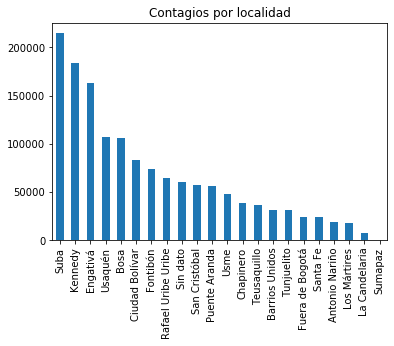

In [8]:
Counts_Localidad = pd.value_counts( df1['LOCALIDAD_ASIS'] )
print(Counts_Localidad)
Counts_Localidad.plot( kind='bar', title='Contagios por localidad' )

In [9]:
# Probabilidad por localidad
PLocalidad = np.array( Counts_Localidad / NObs )
print(PLocalidad)

[1.48022237e-01 1.26646928e-01 1.12217784e-01 7.38851947e-02
 7.32297009e-02 5.77476266e-02 5.06531134e-02 4.47584988e-02
 4.19543652e-02 3.93565397e-02 3.85568372e-02 3.31403881e-02
 2.68952569e-02 2.50267545e-02 2.17582553e-02 2.14836378e-02
 1.67723622e-02 1.66529933e-02 1.33879440e-02 1.25785816e-02
 5.21428093e-03 6.07194286e-05]


In [10]:
Counts_Sexo = pd.value_counts( df1['SEXO'] )
print(Counts_Sexo)

F    774939
M    674350
Name: SEXO, dtype: int64


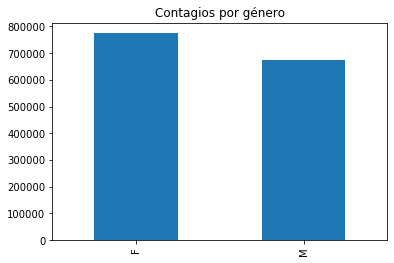

In [11]:
Counts_Sexo.plot( kind='bar', title='Contagios por género' )

In [14]:
# Probabilidad de genero
PSexo = np.array(Counts_Sexo/NObs)
print(PSexo)

[0.53470288 0.46529712]


Recuperado                                1415269
Fallecido                                   27581
Fallecido (No aplica No causa Directa)       4305
Leve                                         1777
Grave                                         187
Moderado                                      170
Name: ESTADO, dtype: int64


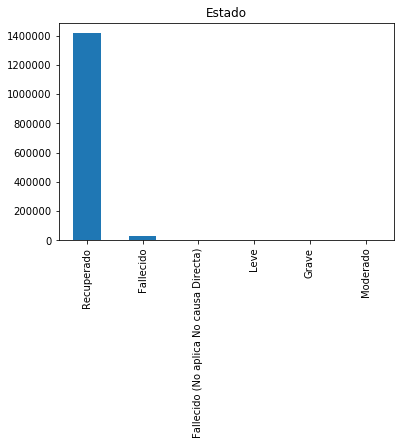

In [15]:
Counts_Estado = pd.value_counts( df1['ESTADO'] )
print(Counts_Estado)
Counts_Estado.plot( kind='bar', title='Estado' )

In [16]:
PEstado = np.array(Counts_Estado/NObs)
print(PEstado)

[9.76526421e-01 1.90307109e-02 2.97042205e-03 1.22611846e-03
 1.29028786e-04 1.17298896e-04]


In [18]:
# Probabilidad de ser mujer y recuperarse

Cut1 = df1['SEXO'] == 'F'
Cut2 = df1['ESTADO'] == 'Recuperado'

dfTest = df1[ (Cut1) & (Cut2) ]

CountTest = pd.value_counts(dfTest['ESTADO'])

print( CountTest.Recuperado/NObs, PSexo[0]*PEstado[0] )

0.5255238948201497 0.522151488126433


# Usar las tablas de contingencia sexo-estado

In [19]:
TablaSexoEstado = pd.crosstab( index = df1['SEXO'], columns=df1['ESTADO'], margins=False)
TablaSexoEstado.head(2)

ESTADO,Fallecido,Fallecido (No aplica No causa Directa),Grave,Leve,Moderado,Recuperado
SEXO,,,,,,
F,10278,1969,67,910,79,761636
M,17303,2336,120,867,91,653633


In [20]:
ObsFreq = np.array(TablaSexoEstado)
print(ObsFreq)

[[ 10278   1969     67    910     79 761636]
 [ 17303   2336    120    867     91 653633]]


In [21]:
# Calculamos las marginales

g = np.array( np.sum(TablaSexoEstado, axis=1)/NObs )
h = np.array( np.sum(TablaSexoEstado, axis=0)/NObs )

print(g)
print(h)

[0.53470288 0.46529712]
[1.90307109e-02 2.97042205e-03 1.29028786e-04 1.22611846e-03
 1.17298896e-04 9.76526421e-01]


In [24]:
Pse = np.zeros((len(g),len(h)))

for i in range(len(g)):
    for j in range(len(h)):
        Pse[i,j] = g[i]*h[j] # Si las variables son independientes

In [25]:
print(Pse)

[[1.01757759e-02 1.58829322e-03 6.89920632e-05 6.55609071e-04
  6.27200574e-05 5.22151488e-01]
 [8.85493501e-03 1.38212883e-03 6.00367226e-05 5.70509391e-04
  5.45788388e-05 4.54374933e-01]]


In [26]:
ExpFreq = Pse*NObs

print(np.round(ExpFreq,0))

[[1.47480e+04 2.30200e+03 1.00000e+02 9.50000e+02 9.10000e+01 7.56748e+05]
 [1.28330e+04 2.00300e+03 8.70000e+01 8.27000e+02 7.90000e+01 6.58521e+05]]


In [32]:
def GetChi2(f0,fe):
    
    diff = f0 - fe
    
    m = (diff)**2/fe
    
   # print(m)
    
    return np.sum(m)

In [33]:
Chi2 = GetChi2(ObsFreq,ExpFreq)
print(Chi2)

3113.034442451175


In [34]:
df = (len( ObsFreq[:,0] )-1 )*(len( ObsFreq[0,:] )-1)
print(df)

5


In [35]:
chi2.ppf( 0.95, df=df )

11.070497693516351

In [38]:
TablaSexoLocalidad = pd.crosstab(index = df1['SEXO'], columns = df1['LOCALIDAD_ASIS'], margins=False)
TablaSexoLocalidad.head(2)

LOCALIDAD_ASIS,Antonio Nariño,Barrios Unidos,Bosa,Chapinero,Ciudad Bolívar,Engativá,Fontibón,Fuera de Bogotá,Kennedy,La Candelaria,...,Rafael Uribe Uribe,San Cristóbal,Santa Fe,Sin dato,Suba,Sumapaz,Teusaquillo,Tunjuelito,Usaquén,Usme
SEXO,,,,,,,,,,,,,,,,,,,,,
F,10341,17033,57255,20102,45412,87543,39835,12018,99418,3731,...,34233,30676,12260,30576,116540,40,19083,16495,57558,26314
M,9062,14501,48876,18877,38281,75093,33576,12290,84130,3826,...,30635,26363,11875,30228,97987,48,17188,14641,49523,21716


In [39]:
ObsFreq = np.array(TablaSexoLocalidad)
print(ObsFreq)

[[ 10341  17033  57255  20102  45412  87543  39835  12018  99418   3731
    9272  29204  34233  30676  12260  30576 116540     40  19083  16495
   57558  26314]
 [  9062  14501  48876  18877  38281  75093  33576  12290  84130   3826
    8958  26676  30635  26363  11875  30228  97987     48  17188  14641
   49523  21716]]


In [40]:
# Calculamos las marginales

g = np.array( np.sum(TablaSexoLocalidad, axis=1)/NObs )
h = np.array( np.sum(TablaSexoLocalidad, axis=0)/NObs )

print(g)
print(h)

[0.53470288 0.46529712]
[1.33879440e-02 2.17582553e-02 7.32297009e-02 2.68952569e-02
 5.77476266e-02 1.12217784e-01 5.06531134e-02 1.67723622e-02
 1.26646928e-01 5.21428093e-03 1.25785816e-02 3.85568372e-02
 4.47584988e-02 3.93565397e-02 1.66529933e-02 4.19543652e-02
 1.48022237e-01 6.07194286e-05 2.50267545e-02 2.14836378e-02
 7.38851947e-02 3.31403881e-02]


In [41]:
Psl = np.zeros((len(g),len(h)))

for i in range(len(g)):
    for j in range(len(h)):
        Psl[i,j] = g[i]*h[j] # Si las variables son independientes

In [42]:
ExpFreq = Psl*NObs

print(np.round(ExpFreq,0))

[[1.03750e+04 1.68610e+04 5.67490e+04 2.08420e+04 4.47510e+04 8.69620e+04
  3.92530e+04 1.29980e+04 9.81440e+04 4.04100e+03 9.74800e+03 2.98790e+04
  3.46850e+04 3.04990e+04 1.29050e+04 3.25120e+04 1.14708e+05 4.70000e+01
  1.93940e+04 1.66490e+04 5.72570e+04 2.56820e+04]
 [9.02800e+03 1.46730e+04 4.93820e+04 1.81370e+04 3.89420e+04 7.56740e+04
  3.41580e+04 1.13100e+04 8.54040e+04 3.51600e+03 8.48200e+03 2.60010e+04
  3.01830e+04 2.65400e+04 1.12300e+04 2.82920e+04 9.98190e+04 4.10000e+01
  1.68770e+04 1.44870e+04 4.98240e+04 2.23480e+04]]


In [43]:
Chi2 = GetChi2(ObsFreq,ExpFreq)
print(Chi2)

893.7274706878296


In [44]:
df = (len( ObsFreq[:,0] )-1 )*(len( ObsFreq[0,:] )-1)
print(df)

21


In [45]:
chi2.ppf( 0.95, df=df )

32.670573340917315

In [46]:
chi2.cdf(Chi2,df=df)

1.0

# Calcular probabilidad de muerte por genero

In [52]:
def GetProb(df,sexo_,estado_):
    
    Cut1 = df['SEXO'] == sexo_
    Cut2 = df['ESTADO'] == estado_
    
    dfM = df[(Cut1)] # Cantidad de mujeres
    dfMR = df[(Cut1)&(Cut2)]
    
    # Categorizar la edad
    h = 1
    
    x = np.arange(0,100+h,h)
    
    H1, bins = np.histogram(dfM['EDAD'], bins=x)
    w = np.diff(bins)
    
    H2, bins = np.histogram(dfMR['EDAD'], bins=x)
 
    DiffH = H1 - H2
    
    return bins, w, H1, H2, DiffH

In [53]:
bins,w,MH1,MH2,MDiffH = GetProb(df1,'F','Recuperado')

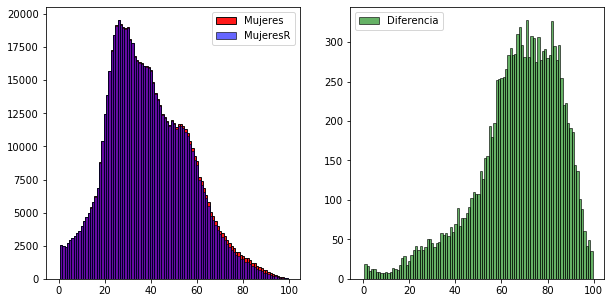

In [54]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)
ax.bar(bins[:-1],MH1, color='r', width=w, ec='k', alpha=0.9, label='Mujeres')
ax.bar(bins[:-1],MH2, color='b', width=w, ec='k', alpha=0.6, label='MujeresR')
ax.legend(loc=0)
ax1.bar(bins[:-1],MDiffH, color='g', width=w, ec='k', alpha=0.6, label='Diferencia')
ax1.legend(loc=0)

In [57]:
meanM = np.sum( bins[:-1]*MDiffH )/np.sum(MDiffH*w)
print(meanM)

EventsM = np.sum(MDiffH*w)

print(EventsM/NObs)

67.02839710756251
0.009160353801070732


In [58]:
bins,w,HH1,HH2,HDiffH = GetProb(df1,'M','Recuperado')

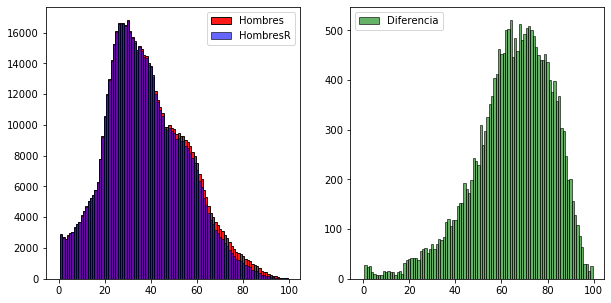

In [59]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)
ax.bar(bins[:-1],HH1, color='r', width=w, ec='k', alpha=0.9, label='Hombres')
ax.bar(bins[:-1],HH2, color='b', width=w, ec='k', alpha=0.6, label='HombresR')
ax.legend(loc=0)
ax1.bar(bins[:-1],HDiffH, color='g', width=w, ec='k', alpha=0.6, label='Diferencia')
ax1.legend(loc=0)

In [60]:
meanH = np.sum( bins[:-1]*HDiffH )/np.sum(HDiffH*w)
print(meanH)

EventsH = np.sum(HDiffH*w)

print(EventsH/NObs)

64.83005746848892
0.014287695552784849


In [62]:
# Porcentaje de evetos que caen entre los 50 a 100 años
boys = 0
girls = 0
adultosH = 0
adultosmayoresH = 0
adultosM = 0
adultosmayoresM = 0

for i in range(len(bins[:-1])):
    
    if bins[i] > 0 and bins[i] <= 20:
        boys += HDiffH[i]*w[i]
        girls += MDiffH[i]*w[i]
    elif bins[i] > 20 and bins[i] <= 50:
        adultosH += HDiffH[i]*w[i]
        adultosM += MDiffH[i]*w[i]
    elif bins[i] > 50 and bins[i] <= 90:
        adultosmayoresH += HDiffH[i]*w[i]
        adultosmayoresM += MDiffH[i]*w[i]
        
print(boys,girls, float(boys)/girls)    
print(adultosH,adultosM, float(adultosH)/adultosM)
print(adultosmayoresH,adultosmayoresM, float(adultosmayoresH)/adultosmayoresM)

344 277 1.2418772563176896
3375 1874 1.8009605122732124
16342 10283 1.5892249343576776
